In [1]:
def ode_system(t, y, params):
    H = y[0]
    B = y[1]
    P = y[2]

    muH = params[0]
    muB = params[1]
    k = params[2]
    phi = params[3]
    beta = params[4]

    dHdt = (muH * H * (1 - (H / k) )) - phi * H * P
    dPdt = beta * phi * H * P
    dBdt = muB * B
    return [dHdt, dBdt, dPdt]

import numpy as np
from scipy.integrate import solve_ivp

def solve_ode_instance(times, theta, y0, method="LSODA", rtol=1e-6, atol=1e-8):
    times = np.asarray(times, dtype=float)
    theta = np.asarray(theta, dtype=float)
    y0 = np.asarray(y0, dtype=float)
    eval = times
    #eval = times[1:]

    sol = solve_ivp(
        fun=lambda t, y: ode_system(t, y, theta),
        t_span=(times[0], times[-1]),
        y0=y0,
        t_eval=eval,
        method=method,
        rtol=rtol,
        atol=atol,
    )

    if not sol.success:
        raise RuntimeError(f"ODE solver failed: {sol.message}")

    # Match your Op output: (time, 3)
    return sol.y.T, sol


In [2]:
import numpy as np
import pandas as pd

path = "avg/"
sub_path = "d7/500-dmsp.xlsx"

host_path = "data/algae/" + path + sub_path
bacteria_path = "data/bacteria/" + path + sub_path

df_host = pd.read_excel(host_path, header=None)
df_bacteria = pd.read_excel(bacteria_path, header=None)
df_bacteria = df_bacteria.replace(0, np.nan)

df_host_time = df_host.iloc[:, 0]
host = df_host.iloc[:, 1].tolist()

df_bacteria_time = df_bacteria.iloc[:, 0]
bacteria = df_bacteria.iloc[:, 1].tolist()

time = df_host_time.tolist()

In [3]:
muH, muB, k, phi, beta = 1.63, 0.66, 4.5e6, 9.6e-9, 54
theta = [muH, muB, k, phi, beta]

H0, B0, P0 = 5e5, 2.4e5, 5.6e7
y0 = [H0, B0, P0]

y_hat, sol = solve_ode_instance(time, theta, y0)

H_hat = y_hat[:, 0]
B_hat = y_hat[:, 1]
P_hat = y_hat[:, 2]

In [4]:
import matplotlib.pyplot as plt

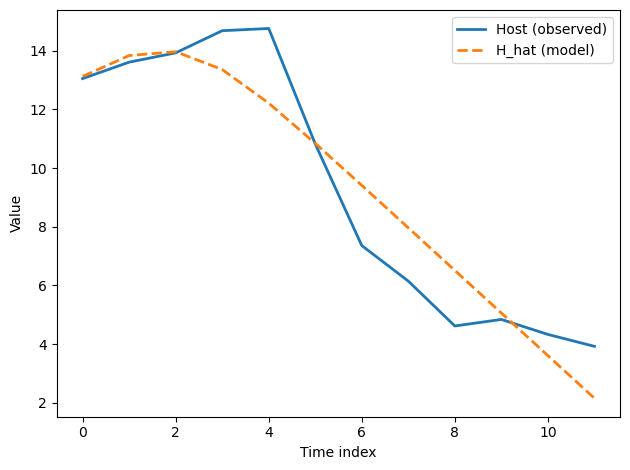

In [5]:
host_arr = np.log(np.asarray(host) + 1e-9)
H_hat_arr = np.log(np.asarray(H_hat) + 1e-9)

plt.figure()
plt.plot(host_arr, label="Host (observed)", linewidth=2)
plt.plot(H_hat_arr, label="H_hat (model)", linewidth=2, linestyle="--")

plt.xlabel("Time index")
plt.ylabel("Value")
plt.legend()
plt.tight_layout()
plt.show()


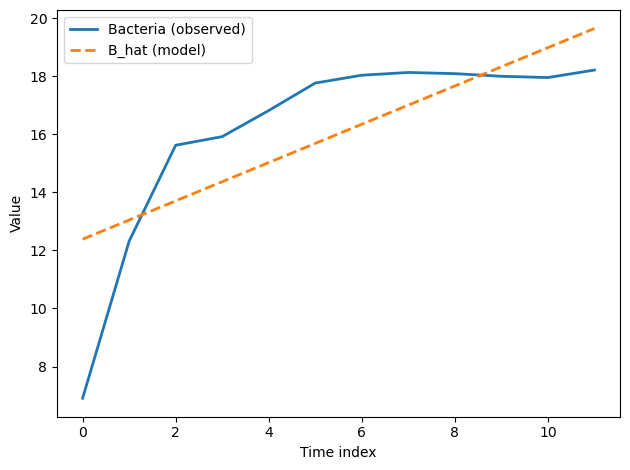

In [6]:
bacteria_arr = np.log(np.asarray(bacteria) + 1e-9)
B_hat_arr = np.log(np.asarray(B_hat) + 1e-9)

plt.figure()
plt.plot(bacteria_arr, label="Bacteria (observed)", linewidth=2)
plt.plot(B_hat_arr, label="B_hat (model)", linewidth=2, linestyle="--")
plt.xlabel("Time index")
plt.ylabel("Value")
plt.legend()
plt.tight_layout()
plt.show()

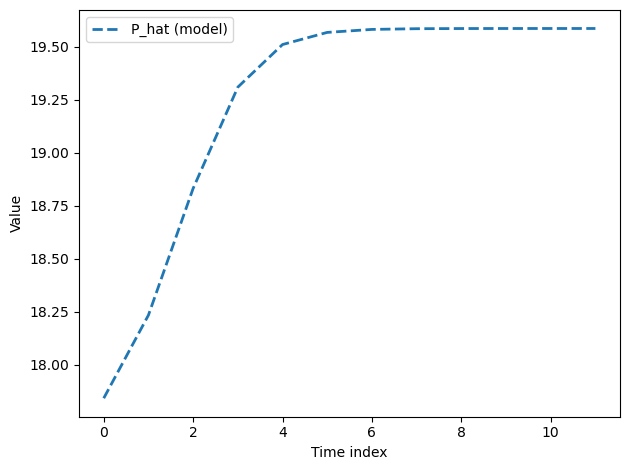

In [7]:
P_hat_arr = np.log(np.asarray(P_hat) + 1e-9)

plt.figure()
plt.plot(P_hat_arr, label="P_hat (model)", linewidth=2, linestyle="--")
plt.xlabel("Time index")
plt.ylabel("Value")
plt.legend()
plt.tight_layout()
plt.show()